In [4]:
# Task 2: Deep Learning with TensorFlow/Keras (MNIST)

# 1. Import necessary libraries
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np


In [5]:

# 2. Load MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 7s 1us/step


In [6]:

# 3. Preprocess data
# - Normalize pixel values to 0-1
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# - Reshape for CNN input: (samples, height, width, channels)
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

# - One-hot encode labels
y_train = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)


In [7]:

# 4. Build CNN model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D((2,2)),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])


c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:

# 5. Compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [9]:

# 6. Train model
history = model.fit(X_train, y_train, epochs=5, batch_size=128, validation_split=0.1)


Epoch 1/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 20s 40ms/step - accuracy: 0.7893 - loss: 0.6630 - val_accuracy: 0.9833 - val_loss: 0.0586
Epoch 2/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 15s 35ms/step - accuracy: 0.9679 - loss: 0.1050 - val_accuracy: 0.9888 - val_loss: 0.0391
Epoch 3/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 17s 40ms/step - accuracy: 0.9767 - loss: 0.0779 - val_accuracy: 0.9882 - val_loss: 0.0393
Epoch 4/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 17s 41ms/step - accuracy: 0.9807 - loss: 0.0649 - val_accuracy: 0.9897 - val_loss: 0.0365
Epoch 5/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 19s 44ms/step - accuracy: 0.9850 - loss: 0.0496 - val_accuracy: 0.9910 - val_loss: 0.0318


In [10]:

# 7. Evaluate model on test set
test_loss, test_acc = model.evaluate(X_test, y_test_cat)
print(f"Test Accuracy: {test_acc:.4f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9875 - loss: 0.0361
Test Accuracy: 0.9901


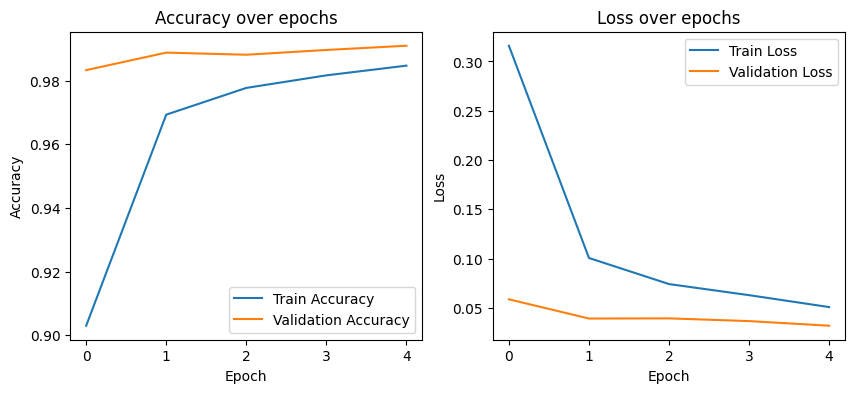

In [11]:

# 8. Plot training history
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


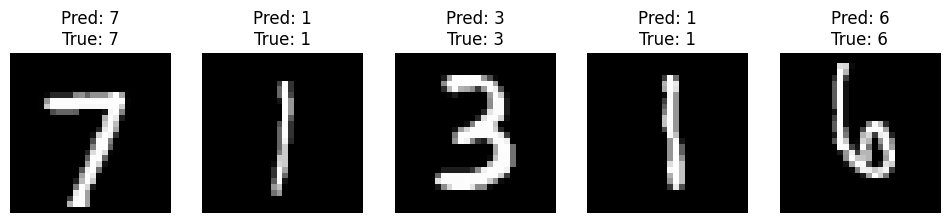

In [12]:

# 9. Visualize 5 sample predictions
sample_idx = np.random.choice(X_test.shape[0], 5, replace=False)
sample_images = X_test[sample_idx]
sample_labels = y_test[sample_idx]

predictions = model.predict(sample_images)
pred_classes = np.argmax(predictions, axis=1)

plt.figure(figsize=(12,3))
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(sample_images[i].reshape(28,28), cmap='gray')
    plt.title(f"Pred: {pred_classes[i]}\nTrue: {sample_labels[i]}")
    plt.axis('off')
plt.show()
